In [1256]:
# |exporti

import streamlit as st
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from streamlit_jupyter import StreamlitPatcher, tqdm

In [1257]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from nbdev.export import nb_export
from collections import Counter

In [1258]:
sp = StreamlitPatcher()
sp.jupyter()  # register patcher with streamlit

In [1259]:
# |exporti

st.title(":blue[Fanz O' Filmz] Movie Recommender")

# :blue[Fanz O' Filmz] Movie Recommender

In [1260]:
# |exporti 

df = pd.read_csv('data/IMDb_All_Genres_etf_clean1.csv')

In [1261]:
# |exporti

movies = df[['Movie_Title', 'Year', 'Director', 'Actors', 'main_genre', 'side_genre']].copy()

In [1262]:
# |exporti

# combine genre columns
def combine_genres(data):
    comb_genres = []
    for i in range(0, data.shape[0]):
        comb_genres.append(data['main_genre'][i] + ' ' + data['side_genre'][i])
        
    return comb_genres

In [1263]:
# |exporti

movies['side_genre'] = movies['side_genre'].str.replace(",","")

In [1264]:
# |exporti

movies['genres'] = combine_genres(movies)

In [1265]:
# |exporti

movies = movies.drop(columns = ['main_genre', 'side_genre'])

In [1266]:
# |exporti

# combine Movie_Title and Year columns to make unique titles in the case of different movies having the same name
def get_clean_title(data):
    clean_title = []
    for i in range(0, data.shape[0]):
        clean_title.append(data['Movie_Title'][i] + ' (' + str(data['Year'][i]) + ')')
        
    return clean_title

In [1267]:
# |exporti

movies['clean_title'] = get_clean_title(movies)

In [1268]:
# |exporti

movies = movies.drop_duplicates(subset=['clean_title']).copy()

In [1269]:
movies['clean_title'].is_unique

True

In [1270]:
# |exporti

movies.reset_index(inplace = True, drop = True)

In [1271]:
movies.head()

,Movie_Title,Year,Director,Actors,genres,clean_title
0,Kantara,2022,Rishab Shetty,"Rishab Shetty, Sapthami Gowda, Kishore Kumar G...",Action Adventure Drama,Kantara (2022)
1,The Dark Knight,2008,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",Action Crime Drama,The Dark Knight (2008)
2,The Lord of the Rings: The Return of the King,2003,Peter Jackson,"Elijah Wood, Viggo Mortensen, Ian McKellen, Or...",Action Adventure Drama,The Lord of the Rings: The Return of the King ...
3,Inception,2010,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...",Action Adventure Sci-Fi,Inception (2010)
4,The Lord of the Rings: The Two Towers,2002,Peter Jackson,"Elijah Wood, Ian McKellen, Viggo Mortensen, Or...",Action Adventure Drama,The Lord of the Rings: The Two Towers (2002)


In [1272]:
# |exporti

movies['Director'] = movies["Director"].str.replace("Directors:", "")
movies['Director'] = movies['Director'].map(lambda x: x.replace(" ", "").lower().split(',')[:3])

movies['Actors'] = movies['Actors'].map(lambda x: x.replace(" ", "").lower().split(',')[:4])

movies['genres'] = movies['genres'].map(lambda x: x.lower().split())

In [1273]:
movies.head()

,Movie_Title,Year,Director,Actors,genres,clean_title
0,Kantara,2022,[rishabshetty],"[rishabshetty, sapthamigowda, kishorekumarg., ...","[action, adventure, drama]",Kantara (2022)
1,The Dark Knight,2008,[christophernolan],"[christianbale, heathledger, aaroneckhart, mic...","[action, crime, drama]",The Dark Knight (2008)
2,The Lord of the Rings: The Return of the King,2003,[peterjackson],"[elijahwood, viggomortensen, ianmckellen, orla...","[action, adventure, drama]",The Lord of the Rings: The Return of the King ...
3,Inception,2010,[christophernolan],"[leonardodicaprio, josephgordon-levitt, elliot...","[action, adventure, sci-fi]",Inception (2010)
4,The Lord of the Rings: The Two Towers,2002,[peterjackson],"[elijahwood, ianmckellen, viggomortensen, orla...","[action, adventure, drama]",The Lord of the Rings: The Two Towers (2002)


In [1274]:
genres_counts = Counter(g for genres in movies['genres'] for g in genres)
print(f"There are {len(genres_counts)} genres.")
genres_counts.most_common()

There are 22 genres.


[('drama', 3272),
 ('comedy', 2261),
 ('action', 1630),
 ('crime', 1208),
 ('adventure', 1155),
 ('romance', 883),
 ('thriller', 878),
 ('mystery', 643),
 ('horror', 524),
 ('sci-fi', 448),
 ('fantasy', 438),
 ('biography', 428),
 ('animation', 321),
 ('family', 265),
 ('history', 180),
 ('music', 149),
 ('sport', 122),
 ('war', 107),
 ('musical', 69),
 ('western', 61),
 ('film-noir', 27),
 ('reality-tv', 1)]

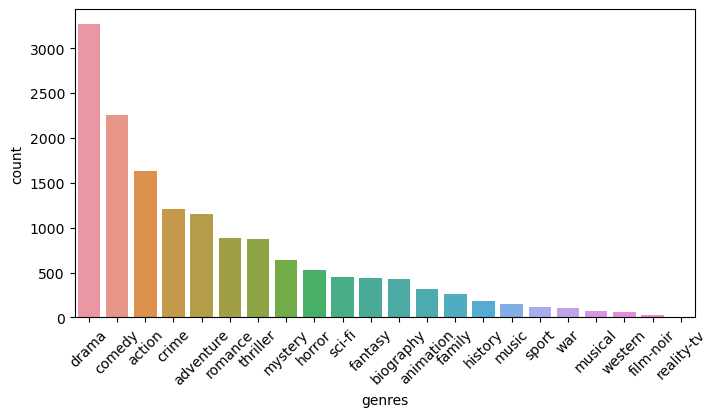

In [1275]:
genres_counts_df = pd.DataFrame([genres_counts]).T.reset_index()
genres_counts_df.columns = ['genres', 'count']
genres_counts_df = genres_counts_df.sort_values(by='count', ascending=False)

fig = plt.figure(figsize=(8,4))
sns.barplot(x='genres', y='count', data=genres_counts_df)
plt.xticks(rotation=45)
plt.show()

In [1276]:
actor_counts = Counter(a for actors in movies['Actors'] for a in actors)
print(f"There are {len(actor_counts)} actors.")
actor_counts.most_common()

There are 8431 actors.


[('robertdeniro', 61),
 ('tomhanks', 49),
 ('samuell.jackson', 48),
 ('nicolascage', 47),
 ('brucewillis', 42),
 ('johnnydepp', 42),
 ('markwahlberg', 42),
 ('sylvesterstallone', 40),
 ('mattdamon', 39),
 ('liamneeson', 38),
 ('bradpitt', 38),
 ('adamsandler', 38),
 ('keanureeves', 37),
 ('morganfreeman', 37),
 ('nicolekidman', 37),
 ('tomcruise', 36),
 ('denzelwashington', 36),
 ('clinteastwood', 35),
 ('matthewmcconaughey', 35),
 ('melgibson', 35),
 ('dwaynejohnson', 35),
 ('anthonyhopkins', 35),
 ('juliaroberts', 35),
 ('harrisonford', 34),
 ('benaffleck', 34),
 ('willemdafoe', 34),
 ('eddiemurphy', 34),
 ('ryanreynolds', 33),
 ('scarlettjohansson', 33),
 ('cateblanchett', 33),
 ('kevincostner', 33),
 ('christianbale', 32),
 ('jasonstatham', 32),
 ('charlizetheron', 32),
 ('ewanmcgregor', 32),
 ('woodyharrelson', 32),
 ('owenwilson', 32),
 ('robinwilliams', 32),
 ('georgeclooney', 31),
 ('antoniobanderas', 31),
 ('merylstreep', 31),
 ('alpacino', 30),
 ('juliannemoore', 30),
 ('john

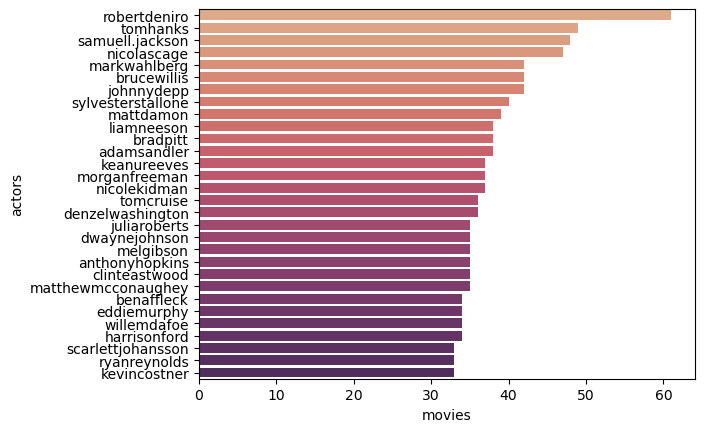

In [1277]:
actor_counts_df = pd.DataFrame([actor_counts]).T.reset_index()
actor_counts_df.columns = ['actors', 'movies']
actor_counts_df = actor_counts_df.sort_values(by='movies', ascending=False)

sns.barplot(data=actor_counts_df.head(30), x='movies', y='actors', palette='flare');

In [1278]:
# |exporti

y = 2000

In [1279]:
# |exporti

def round_down(year):
    return year - (year%10)

round_down(y)

2000

In [1280]:
# |exporti

movies['decade'] = movies['Year'].apply(round_down)

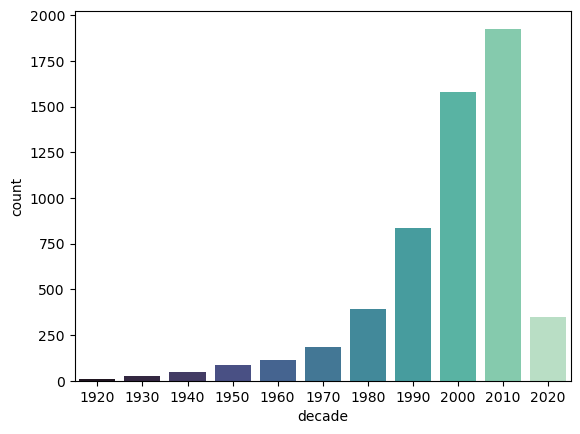

In [1281]:
sns.countplot(x=movies['decade'], palette='mako');

In [1282]:
# |exporti

movies['Director'] = movies['Director'].str.join(" ")

movies['Actors'] = movies['Actors'].str.join(" ")

movies['genres'] = movies['genres'].str.join(" ")

In [1283]:
# |exporti

# combine features
def combine_features(data):
    combined_features = []
    for i in range(0, data.shape[0]):
        combined_features.append(str(data['decade'][i]) + ' ' +
                                  data['genres'][i] + ' ' +
                                  data['Actors'][i] + ' ' +
                                  data['Director'][i])
        
    return combined_features

In [1284]:
# |exporti

movies['combined_features'] = combine_features(movies)

In [1285]:
movies

,Movie_Title,Year,Director,Actors,genres,clean_title,decade,combined_features
0,Kantara,2022,rishabshetty,rishabshetty sapthamigowda kishorekumarg. achy...,action adventure drama,Kantara (2022),2020,2020 action adventure drama rishabshetty sapth...
1,The Dark Knight,2008,christophernolan,christianbale heathledger aaroneckhart michael...,action crime drama,The Dark Knight (2008),2000,2000 action crime drama christianbale heathled...
2,The Lord of the Rings: The Return of the King,2003,peterjackson,elijahwood viggomortensen ianmckellen orlandob...,action adventure drama,The Lord of the Rings: The Return of the King ...,2000,2000 action adventure drama elijahwood viggomo...
3,Inception,2010,christophernolan,leonardodicaprio josephgordon-levitt elliotpag...,action adventure sci-fi,Inception (2010),2010,2010 action adventure sci-fi leonardodicaprio ...
4,The Lord of the Rings: The Two Towers,2002,peterjackson,elijahwood ianmckellen viggomortensen orlandob...,action adventure drama,The Lord of the Rings: The Two Towers (2002),2000,2000 action adventure drama elijahwood ianmcke...
...,...,...,...,...,...,...,...,...
5546,Disaster Movie,2008,jasonfriedberg aaronseltzer,carmenelectra vanessalachey nicoleparker mattl...,comedy sci-fi,Disaster Movie (2008),2000,2000 comedy sci-fi carmenelectra vanessalachey...
5547,The Hottie & the Nottie,2008,tomputnam,parishilton joeldavidmoore christinelakin joha...,comedy romance,The Hottie & the Nottie (2008),2000,2000 comedy romance parishilton joeldavidmoore...
5548,From Justin to Kelly,2003,robertiscove,kellyclarkson justinguarini katherinebailess a...,comedy musical romance,From Justin to Kelly (2003),2000,2000 comedy musical romance kellyclarkson just...
5549,Superbabies: Baby Geniuses 2,2004,bobclark,jonvoight scottbaio vanessaangel skylershaye,comedy family sci-fi,Superbabies: Baby Geniuses 2 (2004),2000,2000 comedy family sci-fi jonvoight scottbaio ...


In [1286]:
# |exporti

count = CountVectorizer()
count_matrix = count.fit_transform(movies['combined_features'])

In [1287]:
count_matrix.shape

(5551, 11040)

In [1288]:
# |exporti

cs = cosine_similarity(count_matrix)

In [1292]:
cs

array([[1.        , 0.20100756, 0.30151134, ..., 0.        , 0.        ,
        0.        ],
       [0.20100756, 1.        , 0.33333333, ..., 0.11111111, 0.10540926,
        0.        ],
       [0.30151134, 0.33333333, 1.        , ..., 0.11111111, 0.10540926,
        0.        ],
       ...,
       [0.        , 0.11111111, 0.11111111, ..., 1.        , 0.21081851,
        0.21081851],
       [0.        , 0.10540926, 0.10540926, ..., 0.21081851, 1.        ,
        0.2       ],
       [0.        , 0.        , 0.        , ..., 0.21081851, 0.2       ,
        1.        ]])

In [1293]:
# |exporti

indices = pd.Series(movies.index, index=movies['clean_title'])

In [1294]:
indices

clean_title
Kantara (2022)                                             0
The Dark Knight (2008)                                     1
The Lord of the Rings: The Return of the King (2003)       2
Inception (2010)                                           3
The Lord of the Rings: The Two Towers (2002)               4
                                                        ... 
Disaster Movie (2008)                                   5546
The Hottie & the Nottie (2008)                          5547
From Justin to Kelly (2003)                             5548
Superbabies: Baby Geniuses 2 (2004)                     5549
Cumali Ceber: Allah Seni Alsin (2017)                   5550
Length: 5551, dtype: int64

In [1295]:
# |exporti

def recommend(movie):
    movie_indices = movies[movies['clean_title'] == movie].index[0]
    distances = cs[movie_indices]
    movies_list = sorted(list(enumerate(distances)), reverse=True, key=lambda x: x[1])[1:6]

    recommended_movies = []
    for i in movies_list:
        recommended_movies.append([movies.iloc[i[0]].clean_title])

    return recommended_movies, movies_list

In [1296]:
recommend("The Suicide Squad (2021)")

([['Birds of Prey and the Fantabulous Emancipation of One Harley Quinn (2020)'],
  ['Guardians of the Galaxy (2014)'],
  ['Minnal Murali (2021)'],
  ['Guardians of the Galaxy Vol. 2 (2017)'],
  ['Free Guy (2021)']],
 [(1196, 0.5555555555555556),
  (80, 0.4444444444444444),
  (102, 0.4444444444444444),
  (195, 0.4444444444444444),
  (415, 0.4444444444444444)])

In [1297]:
# |exporti

if st.button('Get Recommendations'):
    recommendations = recommend(selected_movie_name)
    st.write("Based on your selection, we recommend the following movies:")
    for j in recommendations:
        st.write(j)

In [ ]:
nb_export("movie-test.ipynb", lib_path="./", name="testMovieSys2")

Please click the button to open the web app: [![Open in Streamlit](https://static.streamlit.io/badges/streamlit_badge_black_white.svg)](https://sunlongan-testmovierec-testmovierec-iqjd0v.streamlit.app/)